# Data Exploration for Earthquake Dataset

### Keenan Zucker and James Jang


In this project we are exploring a dataset that includes all of the earthquakes from the last 30 days, which includes attributes like location, magnitude, depth, and more. In this notebook I am going to do some visualization to try to better understand the data. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

quakes = pd.read_csv("./data/query.csv")

print quakes.columns
print quakes.head()


Index([u'time', u'latitude', u'longitude', u'depth', u'mag', u'magType',
       u'nst', u'gap', u'dmin', u'rms', u'net', u'id', u'updated', u'place',
       u'type', u'horizontalError', u'depthError', u'magError', u'magNst',
       u'status', u'locationSource', u'magSource'],
      dtype='object')
                       time  latitude  longitude  depth  mag magType  nst  \
0  2016-02-27T21:34:40.450Z   36.6381   -97.7400   2.47  2.8   mb_lg  NaN   
1  2016-02-27T21:29:43.370Z  -51.7820   139.5587  10.00  5.9      mb  NaN   
2  2016-02-27T21:02:37.710Z   36.4399   -98.7187   9.82  3.4   mb_lg  NaN   
3  2016-02-27T21:02:12.340Z   36.4662   -98.7378   8.22  3.2   mb_lg  NaN   
4  2016-02-27T19:22:58.400Z   19.1644   -64.8414  66.00  3.4      Md   11   

     gap       dmin   rms    ...                      updated  \
0   43.0   0.222000  0.23    ...     2016-02-27T22:17:59.857Z   
1   44.0  10.314000  0.64    ...     2016-02-27T22:12:11.000Z   
2   29.0   0.022000  0.94    ...     2016-0

In [4]:
quakes.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,1458.000000,1458.000000,1458.000000,1458.000000,464.000000,1323.000000,1137.000000,1458.000000,1458.000000,1453.000000,1045.000000,1116.000000
mean,23.426150,-51.576472,64.307283,3.666502,30.504310,130.167550,2.338595,0.633911,5.218093,4.987688,0.103239,42.330645
std,29.207709,113.302529,107.107336,0.938887,32.086075,84.976646,4.471168,0.338164,4.558891,4.877522,0.081228,60.946474
min,-64.257300,-179.956300,-2.000000,2.500000,3.000000,11.000000,0.001651,0.020000,0.090000,0.100000,0.000000,1.000000
25%,4.721925,-149.595475,10.000000,2.800000,8.000000,66.000000,0.228000,0.370000,1.200000,1.700000,0.052000,10.000000
50%,33.814833,-96.643550,25.600000,3.400000,16.000000,105.000000,0.784229,0.620000,4.200000,4.100000,0.093000,22.000000
75%,45.443050,26.886125,72.450000,4.500000,44.000000,176.700000,2.538000,0.860000,8.300000,7.200000,0.145000,50.000000
max,79.346600,179.957000,648.570000,7.200000,159.000000,352.800000,51.694000,1.880000,26.000000,36.900000,0.543000,657.000000


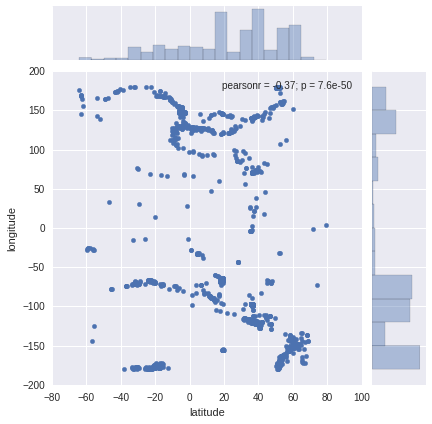

In [57]:
sns.set_context(rc={"figure.figsize": (10, 10)})

sns.jointplot(quakes.latitude, quakes.longitude)

In [6]:
print quakes.type.unique()

['earthquake' 'quarry blast']


Let's investigate the depth of the quakes

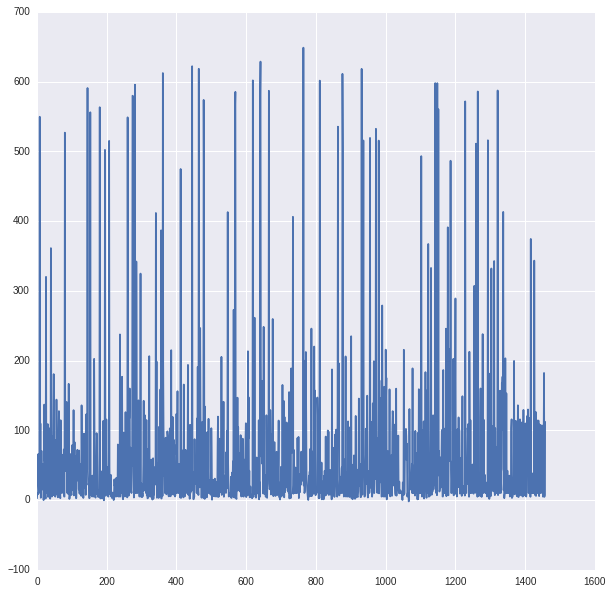

In [8]:
plt.plot(quakes.depth)

According to USGS, there are 3 categories for depth; shallow, intermediate, and deep. Lets break up the data into those catagories and see what we get!

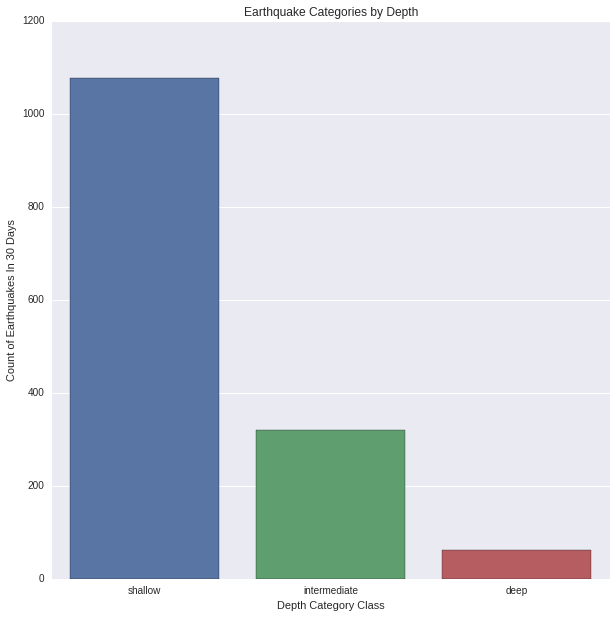

In [79]:
shallow = len(quakes[quakes.depth < 70])
intermediate = len(quakes[(quakes.depth >= 70) & (quakes.depth < 300)])
deep = len(quakes[quakes.depth >= 300])

names = ['shallow', 'intermediate', 'deep']
counts = [shallow, intermediate, deep]

sns.barplot(names, counts)
sns.plt.title("Earthquake Categories by Depth")
sns.axlabel("Depth Category Class", "Count of Earthquakes In 30 Days")

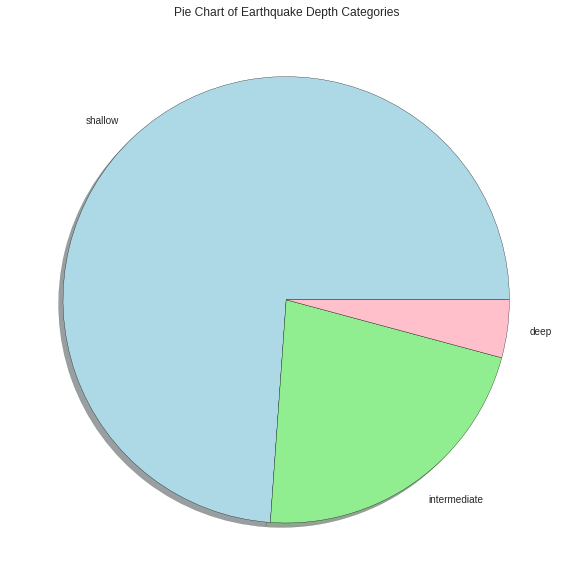

In [82]:
# And now for a pie chart!

colors = ['lightblue', 'lightgreen', 'pink']
plt.pie(counts, labels=names, shadow=True, colors=colors)
plt.title("Pie Chart of Earthquake Depth Categories")
plt.show()

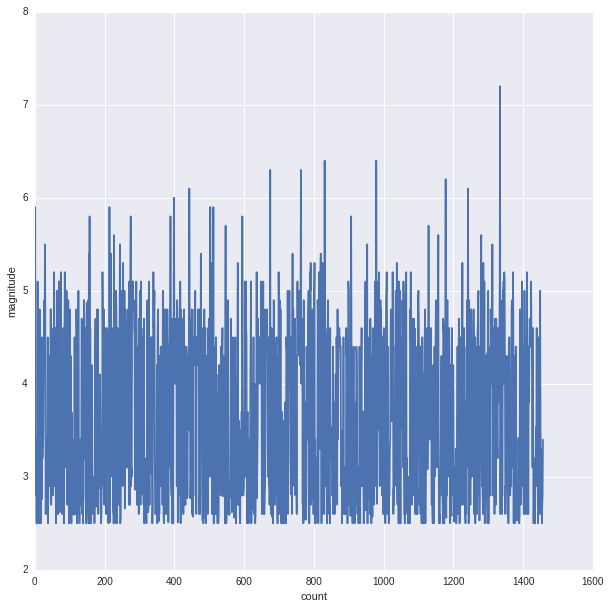

In [72]:
plt.plot(quakes.mag)
plt.xlabel("count")
plt.ylabel("magnitude")
plt.show()

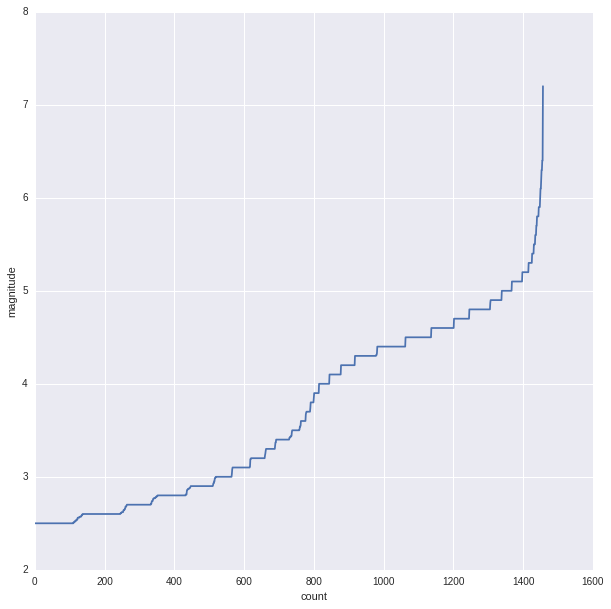

In [70]:
plt.xlabel("count")
plt.ylabel("magnitude")

mags = np.array(quakes.mag)
mags = np.sort(mags)
plt.plot(mags)


Let's sort the earthquakes into the classes that appear on http://www.geo.mtu.edu/UPSeis/magnitude.html

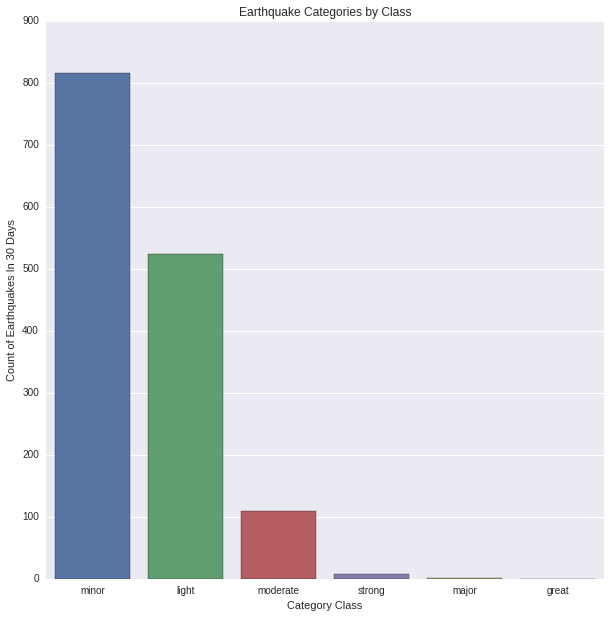

In [77]:

minor = len(quakes[(quakes.mag < 4)])
light = len(quakes[(quakes.mag >= 4) & (quakes.mag < 5)])
moderate = len(quakes[(quakes.mag >= 5) & (quakes.mag < 6)])
strong = len(quakes[(quakes.mag >= 6) & (quakes.mag < 7)])
major = len(quakes[(quakes.mag >= 7) & (quakes.mag < 8)])
great = len(quakes[(quakes.mag >= 8)])

names=['minor', 'light', 'moderate', 'strong', 'major', 'great']
counts=[minor, light, moderate, strong, major, great]

sns.barplot(names, counts)
sns.plt.title("Earthquake Categories by Class")
sns.axlabel("Category Class", "Count of Earthquakes In 30 Days")




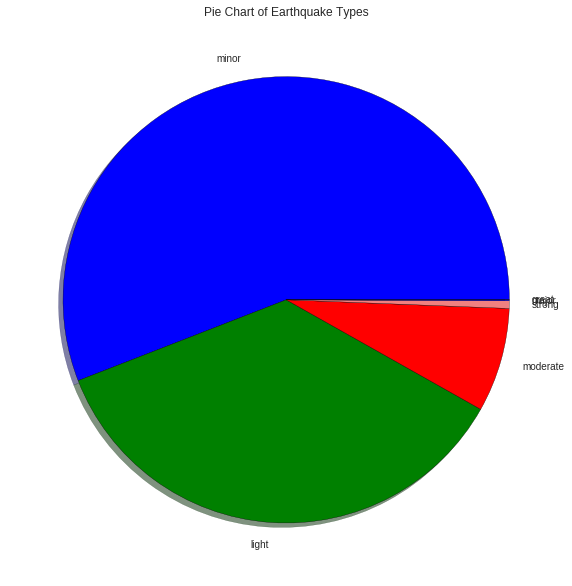

In [76]:
colors = ['blue', 'green', 'red', 'lightcoral']
plt.pie(counts, labels=names, shadow=True, colors=colors)
plt.title("Pie Chart of Earthquake Types")
plt.show()

Now I'm going to try to plot all of the earthquakes across the planet using longitude and latitude. I found a mapping tutorial at http://introtopython.org/visualization_earthquakes.html


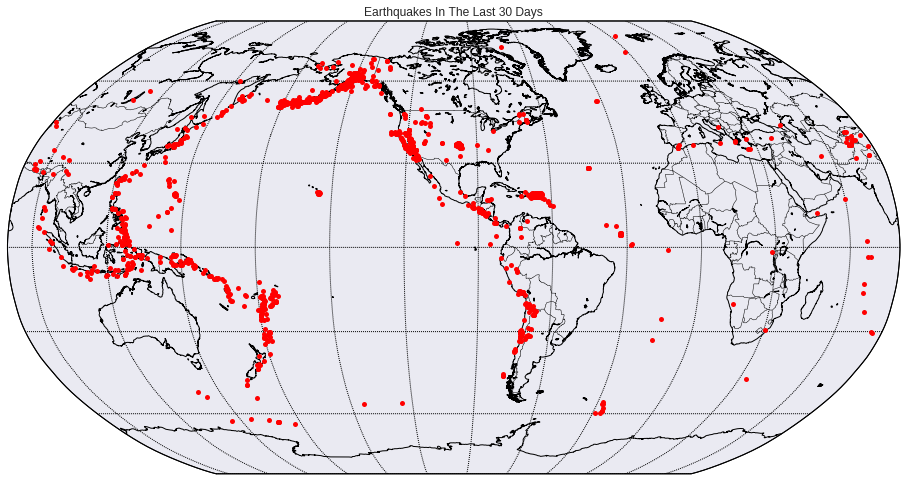

In [55]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(16,12))

my_map = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)

lats = np.array(quakes.latitude)
longs = np.array(quakes.longitude)
mags = np.array(quakes.mag)
# print lats

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

x,y = my_map(longs, lats)
my_map.plot(x, y, 'ro', markersize=5.0)
    
plt.title('Earthquakes In The Last 30 Days')
plt.show()

Now I'll try again using a color mapping system for earthquakes of larger magnitudes, as well as scaling the dots based off of their relative size 

In [46]:
def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')

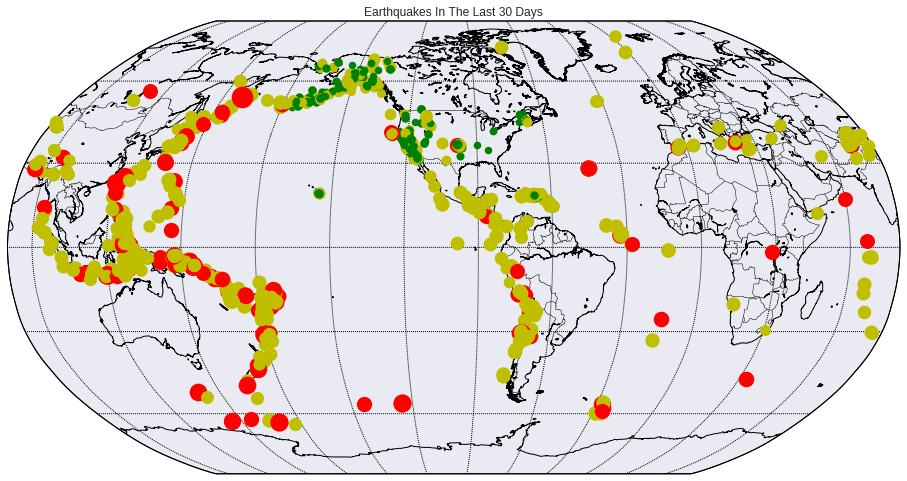

In [52]:
plt.figure(figsize=(16,12))

my_map = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)

lats = np.array(quakes.latitude)
longs = np.array(quakes.longitude)
mags = np.array(quakes.mag)
# print lats

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

min_marker_size = 3.0
for lon, lat, mag in zip(longs, lats, mags):
    x,y = my_map(lon, lat)
    marker_string = get_marker_color(mag)
    msize = mag * min_marker_size
    my_map.plot(x, y, marker_string, markersize=msize)
    
plt.title('Earthquakes In The Last 30 Days')
plt.show()

In [83]:
quakes.groupby('mag').mean()

,latitude,longitude,depth,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
mag,,,,,,,,,,,
2.50,46.002753,-122.049976,42.783685,22.216667,156.812742,0.418827,0.484812,2.613063,3.454273,0.093714,11.320000
2.51,36.383111,-108.579778,4.026667,38.000000,67.666667,0.086410,0.106667,0.200000,0.490000,0.135000,48.000000
2.52,33.095611,-130.485833,6.405333,25.333333,111.666667,0.073274,0.270000,0.853333,1.596667,0.168000,32.333333
2.53,33.482222,-118.410833,4.252667,27.666667,95.000000,0.063000,0.140000,0.393333,0.716667,0.147000,12.333333
2.54,28.675389,-144.104833,9.260000,38.000000,139.000000,0.058813,0.190000,0.593333,0.610000,0.155000,43.000000
2.56,32.620367,-126.375566,5.954000,45.400000,56.200000,0.056403,0.124000,0.178000,0.506000,0.196400,53.800000
2.57,42.776400,-119.153800,20.102600,29.200000,125.200000,0.162526,0.198000,0.534000,0.846000,0.151800,32.800000
2.58,36.394750,-119.618500,3.970000,40.000000,43.000000,0.013102,0.135000,0.160000,0.275000,0.174500,71.000000
2.59,29.110167,-139.133331,2.750000,63.500000,28.500000,0.023677,0.145000,0.190000,0.405000,0.312000,37.000000


In [84]:
quakes.groupby('depth').mean()

,latitude,longitude,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
depth,,,,,,,,,,,
-2.000,49.636667,-114.909000,2.98,7,263.000000,0.872000,0.270,8.76,31.61,0.183,4
-0.380,36.270000,-118.017667,2.95,35,36.000000,0.266400,0.150,0.14,0.47,0.175,171
-0.040,31.179833,-115.946667,3.37,16,221.000000,0.919900,0.390,1.58,2.69,0.145,25
0.000,69.107500,-144.678900,3.10,NaN,NaN,NaN,0.770,0.90,3.00,NaN,NaN
0.088,19.345167,-155.021500,2.54,40,199.000000,0.076190,0.140,0.72,0.28,0.126,17
0.100,62.012500,-150.718800,2.50,36,39.599997,0.382682,0.720,0.20,0.30,NaN,30
0.466,35.727800,-97.163400,3.00,NaN,47.000000,NaN,0.780,1.30,7.60,NaN,NaN
0.700,53.016000,-169.620300,3.20,NaN,NaN,NaN,0.350,1.10,0.30,NaN,NaN
0.800,50.270500,179.015300,4.30,24,244.799980,NaN,0.570,7.80,4.00,NaN,NaN
